In [20]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [21]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "dataframe_concatenado.csv" #Nombre del archivo a cargar

In [22]:
data = pd.read_csv(mainpath+filename, sep=",")
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
0,-29.83,2022-07-01 13:25:21.280,680,148.360312,91,1.476621,23,53.488372,3341.061704,5328.681774,28221.219083,1.594907,0,0,1
1,-111.04,2022-07-01 13:25:10.500,664,194.773965,90,1.206969,23,57.500000,1405.554118,1806.423996,7091.854690,1.285204,0,0,1
2,-95.33,2022-07-01 13:25:16.140,832,184.431592,90,1.531681,22,52.380952,2312.004702,4062.403791,20176.263778,1.757091,0,0,1
3,250.32,2022-07-01 13:25:07.140,656,197.497749,89,1.136568,26,65.000000,784.287901,1629.490612,4862.066247,2.077669,0,0,1
4,155.67,2022-07-01 13:25:21.020,680,148.360312,91,1.496815,23,53.488372,3224.521574,5171.380043,27419.724444,1.603767,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55465,21.31,2022-07-02 02:17:01.250,1065,0.000000,53,0.000000,0,0.000000,4952.636478,21698.600327,182813.669515,4.381222,1,0,0
55466,189.18,2022-07-02 02:16:55.150,975,0.000000,53,0.000000,0,0.000000,4752.324507,19376.395447,180128.880924,4.077246,1,0,0
55467,-370.90,2022-07-02 02:16:51.100,965,251.857703,52,0.000000,8,42.105263,4648.755726,18230.284268,163606.994916,3.921541,1,0,0
55468,-9.60,2022-07-02 02:16:18.300,990,391.396444,56,1.295545,7,41.176471,8546.464800,10778.759849,81108.182128,1.261195,1,0,0


Tamaño de muestras preictales :18500


(array([18500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

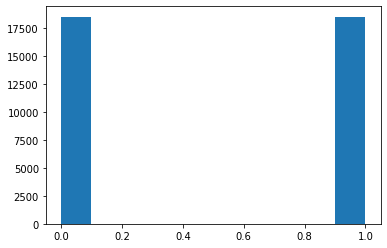

In [23]:
#Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Definiendo los datos
X = Sample[['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creando el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada y primera capa oculta
    layers.Dropout(0.2),  # Capa de dropout para regularización
    layers.Dense(64, activation='relu'),  # Segunda capa oculta
    layers.Dropout(0.2),  # Otra capa de dropout
    layers.Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilando el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Utilizamos binary_crossentropy porque es un problema de clasificación binaria
              metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluando el modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Convertir las predicciones a 0s y 1s
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión de la red neuronal: {accuracy}")
print(classification_report(y_test, y_pred))

Epoch 1/30
740/740 [==============================] - 2s 1ms/step - loss: 0.5606 - accuracy: 0.7095 - val_loss: 0.4585 - val_accuracy: 0.7946
Epoch 2/30
740/740 [==============================] - 1s 1ms/step - loss: 0.4550 - accuracy: 0.7841 - val_loss: 0.3845 - val_accuracy: 0.8302
Epoch 3/30
740/740 [==============================] - 1s 1ms/step - loss: 0.4067 - accuracy: 0.8152 - val_loss: 0.3463 - val_accuracy: 0.8613
Epoch 4/30
740/740 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8336 - val_loss: 0.3146 - val_accuracy: 0.8611
Epoch 5/30
740/740 [==============================] - 1s 1ms/step - loss: 0.3409 - accuracy: 0.8479 - val_loss: 0.2913 - val_accuracy: 0.8784
Epoch 6/30
740/740 [==============================] - 1s 1ms/step - loss: 0.3182 - accuracy: 0.8618 - val_loss: 0.2660 - val_accuracy: 0.8890
Epoch 7/30
740/740 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.8710 - val_loss: 0.2507 - val_accuracy: 0.8954
Epoch 

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Definiendo los datos
X = Sample[['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creando el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada y primera capa oculta
    layers.Dropout(0.2),  # Capa de dropout para regularización
    layers.Dense(64, activation='relu'),  # Segunda capa oculta
    layers.Dropout(0.2),  # Otra capa de dropout
    layers.Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilando el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Utilizamos binary_crossentropy porque es un problema de clasificación binaria
              metrics=['accuracy'])

# Definiendo el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Entrenando el modelo con el callback de EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluando el modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Convertir las predicciones a 0s y 1s
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión de la red neuronal: {accuracy}")
print(classification_report(y_test, y_pred))


Epoch 1/100
740/740 [==============================] - 2s 2ms/step - loss: 0.5676 - accuracy: 0.7043 - val_loss: 0.4799 - val_accuracy: 0.7672
Epoch 2/100
740/740 [==============================] - 1s 1ms/step - loss: 0.4657 - accuracy: 0.7765 - val_loss: 0.4001 - val_accuracy: 0.8046
Epoch 3/100
740/740 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8049 - val_loss: 0.3635 - val_accuracy: 0.8451
Epoch 4/100
740/740 [==============================] - 1s 1ms/step - loss: 0.3789 - accuracy: 0.8283 - val_loss: 0.3211 - val_accuracy: 0.8610
Epoch 5/100
740/740 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8416 - val_loss: 0.3142 - val_accuracy: 0.8671
Epoch 6/100
740/740 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8570 - val_loss: 0.2777 - val_accuracy: 0.8818
Epoch 7/100
740/740 [==============================] - 1s 1ms/step - loss: 0.3111 - accuracy: 0.8650 - val_loss: 0.2886 - val_accuracy: 0.8809

Epoch 58/100
740/740 [==============================] - 1s 2ms/step - loss: 0.1288 - accuracy: 0.9489 - val_loss: 0.0850 - val_accuracy: 0.9691
Epoch 59/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1263 - accuracy: 0.9483 - val_loss: 0.0953 - val_accuracy: 0.9630
Epoch 60/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1258 - accuracy: 0.9497 - val_loss: 0.0876 - val_accuracy: 0.9696
Epoch 61/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1245 - accuracy: 0.9508 - val_loss: 0.0831 - val_accuracy: 0.9708
Epoch 62/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1211 - accuracy: 0.9523 - val_loss: 0.0828 - val_accuracy: 0.9676
Epoch 63/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1226 - accuracy: 0.9508 - val_loss: 0.0848 - val_accuracy: 0.9696
Epoch 64/100
740/740 [==============================] - 1s 1ms/step - loss: 0.1258 - accuracy: 0.9507 - val_loss: 0.0809 - val_accuracy:

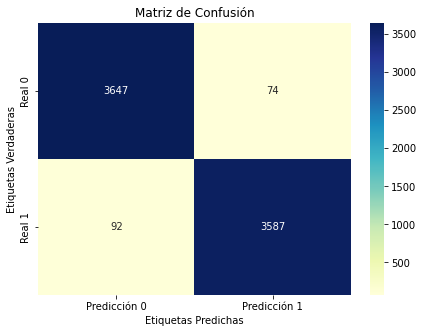

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()

In [49]:
# Función para hacer predicciones con el modelo
def predict_with_model(model, data, scaler):
    # Escalar los datos
    data_scaled = scaler.transform(data)
    predictions = model.predict(data_scaled)
    return np.round(predictions).flatten()

# Usando la función de predicción
predictors = ['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']
X_new = data1[predictors].values

print(X_new)

results = predict_with_model(model, X_new, scaler)
print(results)


[[6.28000000e+02 2.18477936e+01 9.20000000e+01 ... 3.41263828e+01
  2.49789057e+02 3.13659384e-01]
 [6.78000000e+02 4.12332673e+01 9.30000000e+01 ... 1.74922370e+01
  2.52425314e+02 1.29462829e-01]
 [6.42000000e+02 1.91213668e+01 9.20000000e+01 ... 2.45223848e+01
  4.41868074e+02 4.61408165e-01]
 ...
 [9.85000000e+02 2.11223116e+02 5.60000000e+01 ... 7.68281576e+04
  2.09861118e+05 5.18790922e+00]
 [1.00500000e+03 2.23343463e+02 5.60000000e+01 ... 7.45265287e+04
  2.02095716e+05 5.29082895e+00]
 [1.01500000e+03 2.10982109e+02 5.60000000e+01 ... 6.27470183e+04
  1.71624444e+05 4.84651811e+00]]
[[-0.5611015  -0.64328279  0.90380374 ... -0.50868502 -0.18793282
  -0.75463779]
 [-0.46153054 -0.56012357  0.95659737 ... -0.50935211 -0.18793081
  -0.82473114]
 [-0.53322163 -0.65497854  0.90380374 ... -0.50907018 -0.1877869
  -0.69841412]
 ...
 [ 0.1498352   0.16909379 -0.9967669  ...  2.57103533 -0.02870043
   1.10018779]
 [ 0.18966358  0.2210873  -0.9967669  ...  2.47873163 -0.03459946
   1.1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


579/579 [==============================] - 0s 677us/step
[[0.98625433]
 [0.99978125]
 [0.99270296]
 ...
 [0.99846685]
 [0.9985548 ]
 [0.99633783]]
[1. 1. 1. ... 1. 1. 1.]


In [31]:
model_name = "mi_modelo"
model_path = 'saved_model/{}/00000001'.format(model_name)
model.save(model_path)



INFO:tensorflow:Assets written to: saved_model/mi_modelo/00000001/assets


INFO:tensorflow:Assets written to: saved_model/mi_modelo/00000001/assets


In [32]:
import tarfile
import os

with tarfile.open('model.tar.gz', 'w:gz') as tar:
    tar.add(model_path, arcname=os.path.basename(model_path))

In [47]:
data = pd.read_csv(mainpath+filename, sep=",")
data1 = data[data["Seizure"] == 1]
data1

,ECG,Time,Seizure,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF
1001,-25.66,2022-07-01 13:24:24.760,1,628,21.847794,92,0.496101,0,0.000000,108.800771,34.126383,249.789057,0.313659
1002,111.64,2022-07-01 13:24:38.080,1,678,41.233267,93,0.574147,4,15.384615,135.113971,17.492237,252.425314,0.129463
1003,-42.29,2022-07-01 13:24:18.120,1,642,19.121367,92,0.489230,0,0.000000,53.146838,24.522385,441.868074,0.461408
1004,-4.06,2022-07-01 13:24:50.140,1,660,120.469669,92,1.299070,13,39.393939,40.416363,149.484771,593.815833,3.698620
1005,19.95,2022-07-01 13:24:34.200,1,654,41.927220,93,0.512531,5,19.230769,168.454661,31.792269,253.399146,0.188729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55064,39.30,2022-07-02 02:14:36.300,1,1030,207.740191,56,0.657142,10,52.631579,15346.970463,73066.954258,201813.205584,4.761002
55065,55.83,2022-07-02 02:14:53.300,1,1535,223.170339,54,0.644186,12,63.157895,9374.601546,45946.611458,115020.536836,4.901180
55066,-12.27,2022-07-02 02:14:32.950,1,985,211.223116,56,0.566998,9,50.000000,14809.079024,76828.157582,209861.117912,5.187909
55067,16.65,2022-07-02 02:14:35.400,1,1005,223.343463,56,0.621812,11,57.894737,14085.983384,74526.528685,202095.715702,5.290829


         ECG                     Time  Seizure  RRI       SDNN  HR    HR_std  \
1002  111.64  2022-07-01 13:24:38.080        1  678  41.233267  93  0.574147   

      NN50      pNN50          HF         LF  Total_power     LF_HF  
1002     4  15.384615  135.113971  17.492237   252.425314  0.129463  
{'predictions': [[0.999781251]]}
0.999781251
{'predictions': [[0.992702961]]}
0.992702961
{'predictions': [[0.998618484]]}
0.998618484
{'predictions': [[0.999419093]]}
0.999419093
[1, 1, 1, 1]


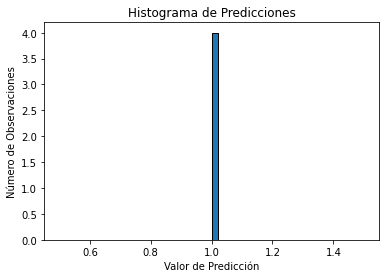

In [67]:
import sagemaker
from sagemaker.tensorflow import TensorFlowPredictor


# Define el nombre del endpoint
endpoint_name = 'tensorflow-inference-2023-09-02-23-00-24-140'  # Cambia esto al nombre real del endpoint

# Crea un predictor
predictor = TensorFlowPredictor(endpoint_name=endpoint_name)

# Usa el predictor para obtener una predicción
#input_data = [618, 25.65814159063469, 97, 0.652648986464887, 2, 6.896551724137931, 12462.459981061436, 9715.511213369073, 41987.7445303172, 0.7795821393314996]
predictors = ['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']
X_new = data1[predictors][1:5]
print(data1[1:2])

# Escala los datos usando el scaler del entrenamiento
X_scaled = scaler.transform(X_new)

# Usa el predictor para obtener las predicciones de validación
results = []
for row in X_scaled:
    raw_result = predictor.predict(row.tolist())
    print(raw_result)
    prediction_value = raw_result['predictions'][0][0]
    print(prediction_value)
    rounded_result = round(prediction_value)
    results.append(rounded_result)
    
print(results)

# Dibuja un histograma de las predicciones
plt.hist(results, bins=50, edgecolor='k')
plt.title("Histograma de Predicciones")
plt.xlabel("Valor de Predicción")
plt.ylabel("Número de Observaciones")
plt.show()

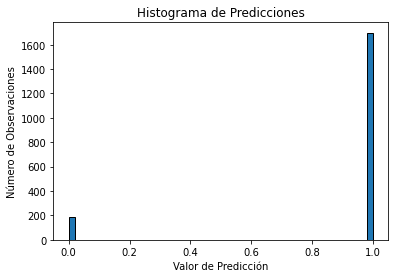

In [56]:
# Dibuja un histograma de las predicciones
plt.hist(results, bins=50, edgecolor='k')
plt.title("Histograma de Predicciones")
plt.xlabel("Valor de Predicción")
plt.ylabel("Número de Observaciones")
plt.show()

In [62]:
from joblib import dump

# Guardar el scaler en un archivo
dump(scaler, 'scaler_filename.pkl')

['scaler_filename.pkl']

In [68]:
data1.head()

,ECG,Time,Seizure,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF
1001,-25.66,2022-07-01 13:24:24.760,1,628,21.847794,92,0.496101,0,0.000000,108.800771,34.126383,249.789057,0.313659
1002,111.64,2022-07-01 13:24:38.080,1,678,41.233267,93,0.574147,4,15.384615,135.113971,17.492237,252.425314,0.129463
1003,-42.29,2022-07-01 13:24:18.120,1,642,19.121367,92,0.489230,0,0.000000,53.146838,24.522385,441.868074,0.461408
1004,-4.06,2022-07-01 13:24:50.140,1,660,120.469669,92,1.299070,13,39.393939,40.416363,149.484771,593.815833,3.698620
1005,19.95,2022-07-01 13:24:34.200,1,654,41.927220,93,0.512531,5,19.230769,168.454661,31.792269,253.399146,0.188729
